/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=9.35. Retur

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B        245057 non-null int64
G        245057 non-null int64
R        245057 non-null int64
Class    245057 non-null int64
dtypes: int64(4)
memory usage: 9.3 MB


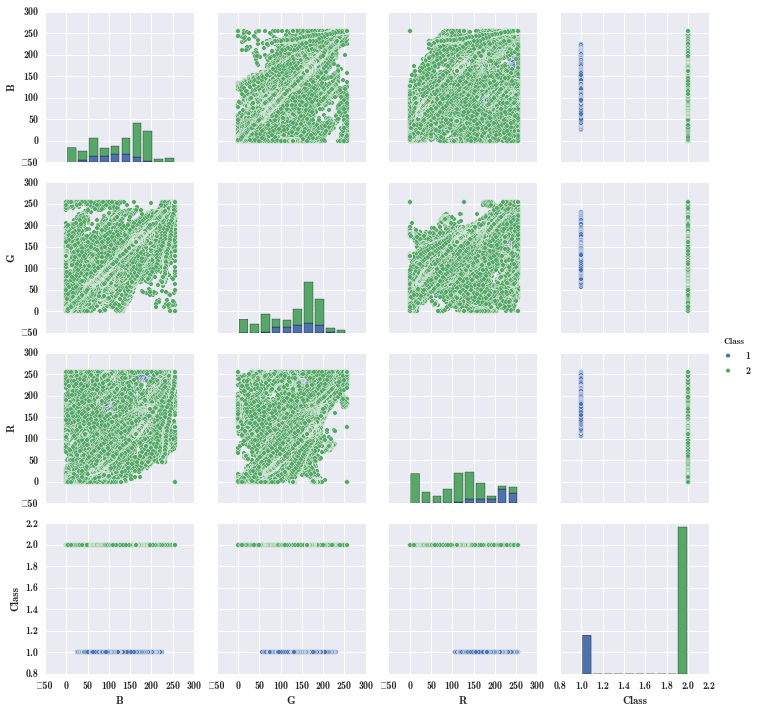

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = '../data/'
from matplotlib.colors import ListedColormap
from sklearn import feature_selection
from sklearn.neighbors import KNeighborsClassifier as KNN
df = pd.read_csv(DATA_DIR + 'Skin_NonSkin.txt', delimiter="\t", header=None)
df.columns = ["B","G","R","Class"]
df.info()
df.describe()
#
# Do a scatter plot of the raw data
#
sns.pairplot(df, hue="Class", size=2.5);

In [2]:
print len(df)
C1size=len(df[df.Class == 1])
C2size=len(df[df.Class == 2])
r = float(C1size) / C2size
X = df.ix[:,:-1]
y = df.ix[:,-1]
print y.value_counts()
print r

#
# seems the number of samples for class 1 << class 2
#

245057
2    194198
1     50859
dtype: int64
0.261892501468


In [3]:
# use the built-in method from SciKit-Learn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.30)

In [4]:
n_neighbors = range(1,31,2)

###
### with cross validation
### by doing different train/test split
###

scores = []
all = []
idx = np.random.uniform(0, 1, len(X)) >= 0.3
for i in range(5):
    np.random.shuffle(idx)
    X_train, X_test = X[idx], X[idx == False]
    y_train, y_test = y[idx], y[idx == False]
    for n in n_neighbors:
        clf = KNN(n, weights='uniform')
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    all.append(scores)
    scores
    
np.mean(all)

0.99932512887533587

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


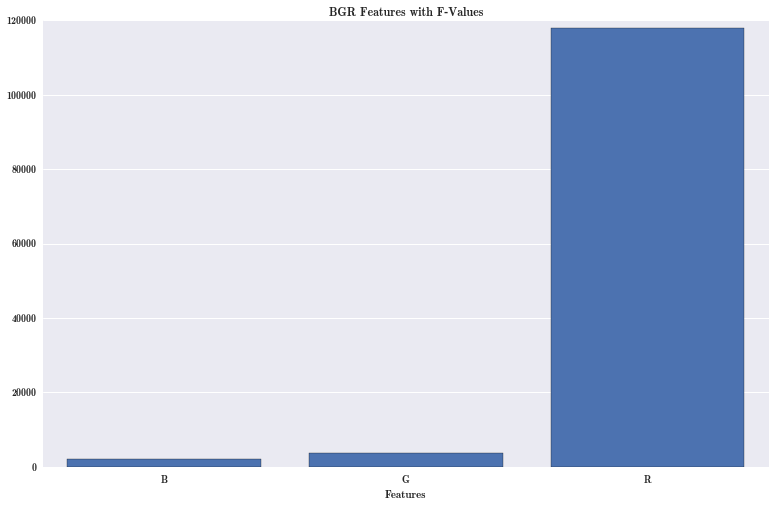

In [5]:
#
# Use F statistics to see what features are dominating
#

F = feature_selection.f_classif(X, y)[0]
title = 'BGR Features with F-Values'

plt.figure(figsize=(13, 8))
ax = sns.barplot(x=df.columns[:-1],y=F)
ax.set_title(title)
ax.set(xlabel="Features");

In [6]:
#
# R is the dominant feature
# but we select both G and R in X as feature
#
X_ = X.ix[:, -2:].values
a = list(y.unique())
y_ = [a.index(v) for v in y]

In [7]:
#
# Do the knn again with k=11
#
clf = KNN(11, weights='uniform')
clf.fit(X_, y_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=11, p=2, weights='uniform')

In [8]:
x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1

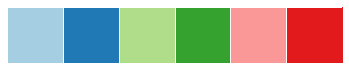

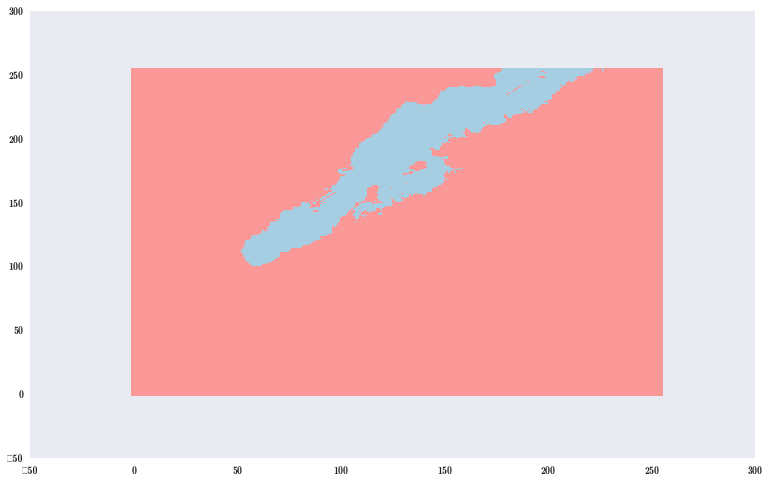

In [9]:
h = 1  # step size in the mesh
#
# Create color maps
#
col_map = sns.color_palette("Paired")
sns.palplot(col_map)
cmap_light = ListedColormap(['#A6CEE3', '#AFDD8A', '#FA9897'])
cmap_bold = ListedColormap(['#2078B4', '#35A12E', '#E31A1C'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
from matplotlib.pyplot import pcolormesh
plt.figure(figsize=(13,8))
pcolormesh(xx, yy, Z, cmap=cmap_light);

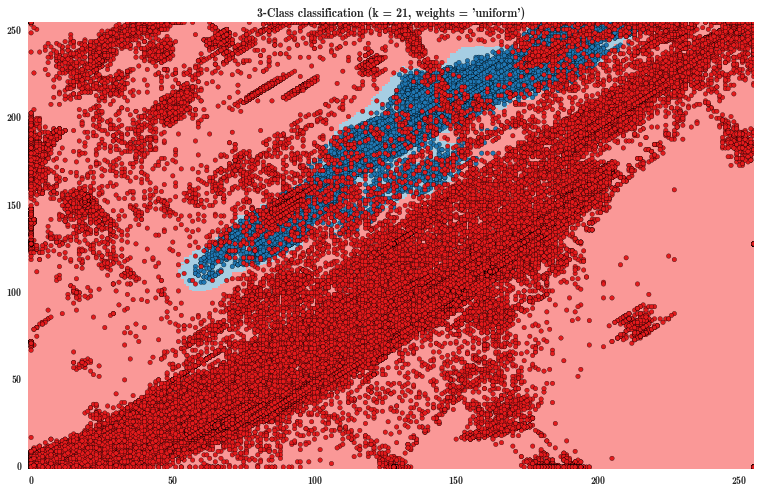

In [10]:
#
# Plot also the training points
#
plt.figure(figsize=(13,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
         % (21, 'uniform'));